In [10]:
import pandas as pd
import numpy as np
import os
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


In [21]:

# Load arrays from the saved .npy files
time = np.load("/Users/adaciortan/Desktop/experiment data/daca ai fii un stick/the column/2025-11-11_h2-200bar_SRB-time.npy")
volume_1 = np.load("/Users/adaciortan/Desktop/experiment data/daca ai fii un stick/the column/2025-11-11_h2-200bar_SRB-volume_1.npy")
volume_2 = np.load("/Users/adaciortan/Desktop/experiment data/daca ai fii un stick/the column/2025-11-11_h2-200bar_SRB-volume_2.npy")




In [ ]:
#integrate leak rates if relevant
#integrate leak data
leak_rate1a= 3.12E-07
leak_rate2a= 2.11E-06
trend1a= leak_rate1a * time
trend2a= leak_rate2a * time
volume_1= volume_1 - trend1a
volume_2= volume_2 - trend2a


In [22]:
def convert_to_moles_and_days(time_array, vol1_array, vol2_array, density, molar_mass):
    """
    Converts Time from minutes to days.
    Converts Volume to Moles using: Volume * (Density / Molar Mass)
    """
    # 1. Convert Time (Minutes -> Days)
    time_days = time_array / 1440.0
    
    # 2. Calculate conversion factor
    # Mass = Volume * Density
    # Moles = Mass / Molar Mass
    conversion_factor = density / molar_mass
    
    # 3. Convert Volumes to Moles
    moles_1 = vol1_array * conversion_factor
    moles_2 = vol2_array * conversion_factor
    
    return time_days, moles_1, moles_2




In [ ]:
#here add density(kg/m^3) and molar mass (g/mol) for density ad different P and T go to https://cmb.tech/hydrogen-tools
#output in days and mmol
time_days,moles_1, moles_2=convert_to_moles_and_days(time,volume_1,volume_2,density=7.397,molar_mass=2.016) 

In [27]:
prov_cum_min = np.multiply(np.arange(0, 18324),1/1440)
time_days=prov_cum_min


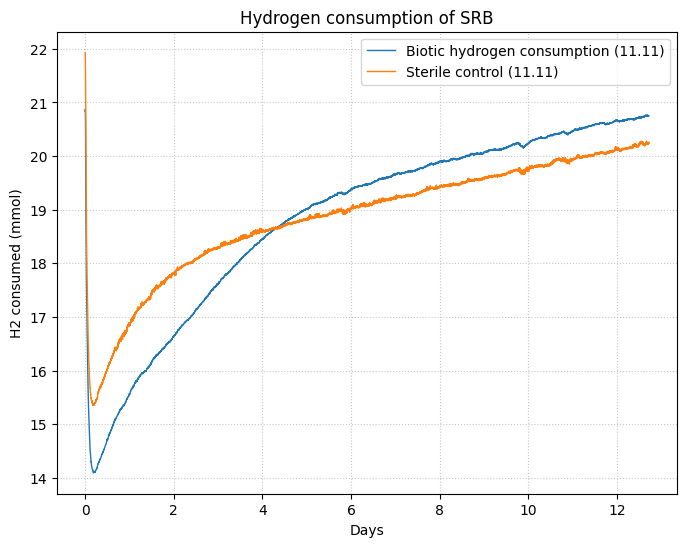

In [28]:

# Create the plot
plt.figure(figsize=(8,6))
plt.plot(time_days, moles_1, label="Biotic hydrogen consumption (11.11)", linewidth=1)
plt.plot(time_days, moles_2, label="Sterile control (11.11)", linewidth=1,)

# Labels and legend
plt.xlabel("Days")
plt.ylabel("H2 consumed (mmol)")
plt.title("Hydrogen consumption of SRB")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)

# Show the plot
plt.show()


In [54]:

def trim_and_zero_arrays(a, b, c):
    """
    1. Finds the index of the minimum value in array 'a' (ignoring NaNs).
    2. Trims a, b, and c to start from that index.
    3. Shifts 'a' and 'b' so their minimum values become 0 (ignoring NaNs).
    """
    
    # 1. Find the index of the lowest value in 'a'
    # We use nanargmin to ignore the gap we created earlier
    idx = np.nanargmin(a)

    # 2. Slice (Trim) all arrays from that index onwards
    a_trim = a[idx:]
    b_trim = b[idx:]
    c_trim = c[idx:]

    # 3. Shift 'a' and 'b' so they start at 0
    # Use nanmin so the 'gap' doesn't break the subtraction
    a_final = a_trim - np.nanmin(a_trim)
    b_final = b_trim - np.nanmin(b_trim)
    
    c_final = c_trim

    return a_final, b_final, c_final, idx


# Run the function
# We treat 'a_input' as the reference for finding the cut point
moles_1_trimmed, moles_2_trimmed, time_days_trimmed, cut_index = trim_and_zero_arrays(moles_1, moles_2,time_days )



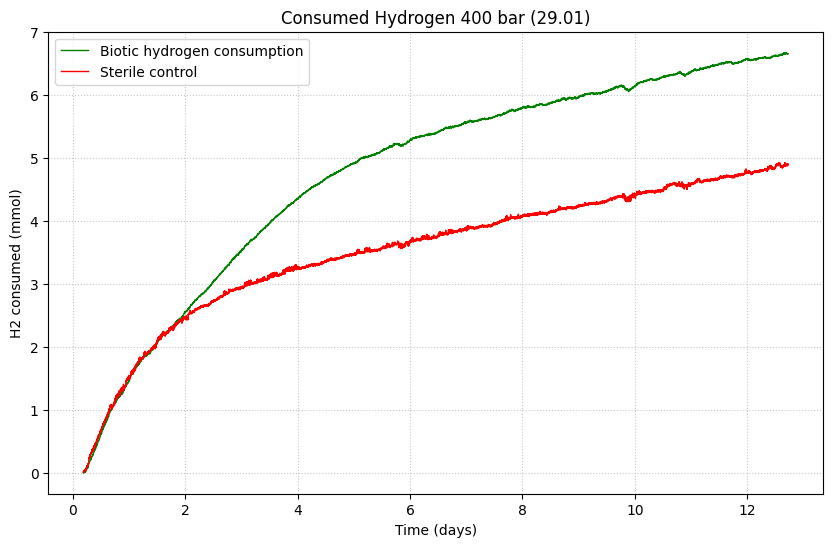

In [55]:
## plot with removed expansion and normalized to zero


# Create the plot
plt.figure(figsize=(10,6))
plt.plot(time_days_trimmed, moles_1_trimmed, label="Biotic hydrogen consumption", linewidth=1,color="green")
plt.plot(time_days_trimmed,moles_2_trimmed, label="Sterile control", linewidth=1,color="red")
#plt.plot(th_cum_min_2, th_c_vol1_2, label="Biotic hydrogen consumption(01.07)", linewidth=1, color="green")
#plt.plot(th_cum_min_2, th_c_vol2_2, label="Sterile control (01.07)", linewidth=1,color="red")
#plt.plot(h_cum_min_1, h_c_vol1_1, label="Volume change with SRB (18.06)", linewidth=1)
#plt.plot(h_cum_min_1, h_c_vol2_1, label="Only Medium (18.06)", linewidth=1,)
# Labels and legend
plt.xlabel("Time (days)")
plt.ylabel("H2 consumed (mmol)")
plt.title("Consumed Hydrogen 400 bar (29.01)") #, Both Experiments
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)

# Show the plot
plt.show()


In [56]:
moles_consumed=moles_1_trimmed-moles_2_trimmed
time= time_days_trimmed

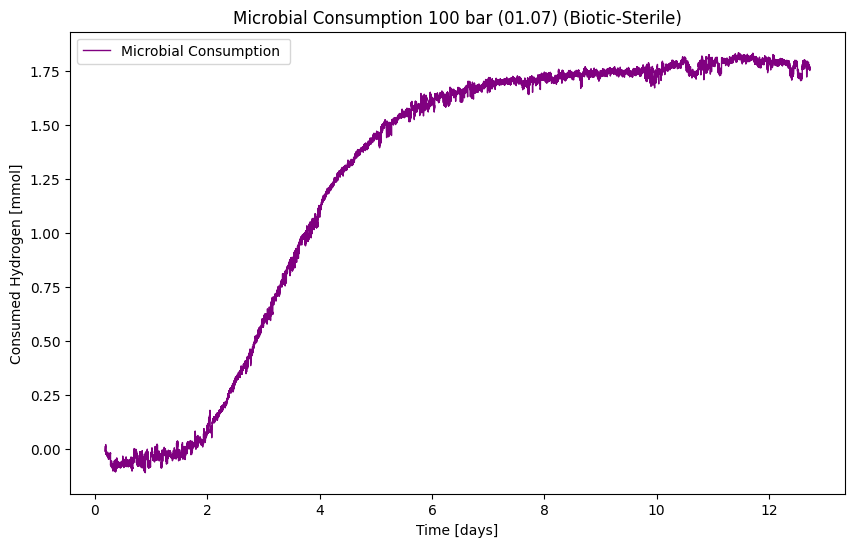

In [57]:

plt.figure(figsize=(10,6))
plt.plot(time, moles_consumed, label="Microbial Consumption ", linewidth=1, color="purple")
#plt.plot(th_cum_min_2,th_c_vol2_3, label="Microbial Consumption (01.07)", linewidth=1, color="blue")


plt.xlabel("Time [days]")
plt.ylabel("Consumed Hydrogen [mmol]")
plt.legend()
plt.title("Microbial Consumption 100 bar (01.07) (Biotic-Sterile)")
plt.show()

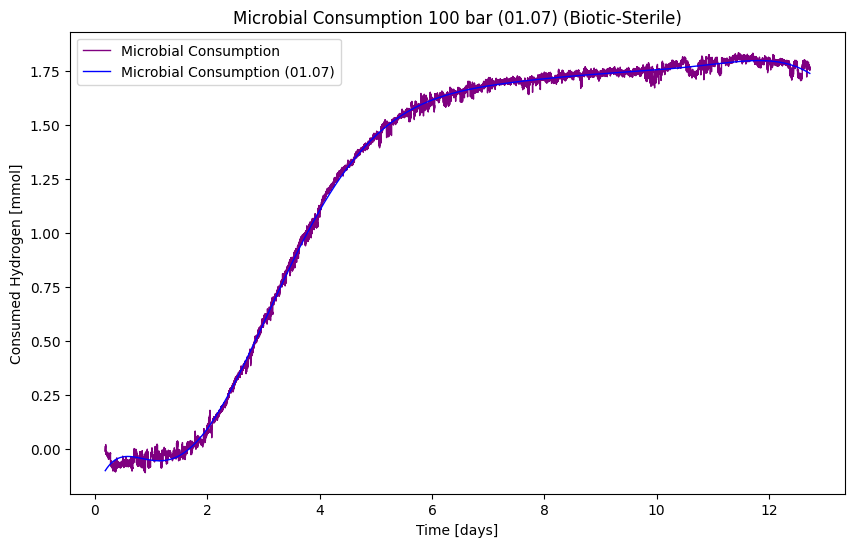

In [90]:
import numpy as np

def fit_line(x_data, y_data, degree):
    """
    Fits a polynomial line to a dataset.
    Default degree is 1 (straight line: y = mx + b).
    """
    # 1. Calculate the coefficients using Least Squares
    # For degree=1, this returns [slope (m), y-intercept (b)]
    coefficients = np.polyfit(x_data, y_data, degree)
    
    # 2. Create a polynomial function from these coefficients
    # This makes it easy to plug in any 'x' and get the fitted 'y'
    trendline_func = np.poly1d(coefficients)
    
    # 3. Generate the fitted y-values for the original x_data
    y_fitted = trendline_func(x_data)
    
    return coefficients, y_fitted, trendline_func

# --- Example Usage ---
# x = np.array([0, 1, 2, 3, 4, 5])
# y = np.array([2.1, 3.9, 6.2, 8.0, 9.9, 12.1])
coeffs8, fitted_data8, line_equation8 = fit_line(time, moles_consumed, degree=9)
coeffs1, fitted_data1, line_equation1 = fit_line(time, moles_consumed,degree=8 )
# print(f"Equation of the line: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}")

plt.figure(figsize=(10,6))
plt.plot(time, moles_consumed, label="Microbial Consumption ", linewidth=1, color="purple")
plt.plot(time,fitted_data8, label="Microbial Consumption (01.07)", linewidth=1, color="blue")


plt.xlabel("Time [days]")
plt.ylabel("Consumed Hydrogen [mmol]")
plt.legend()
plt.title("Microbial Consumption 100 bar (01.07) (Biotic-Sterile)")
plt.show()


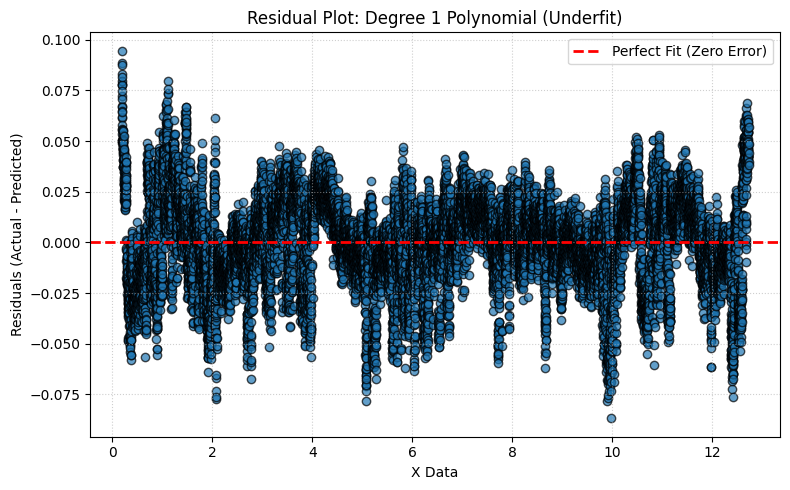

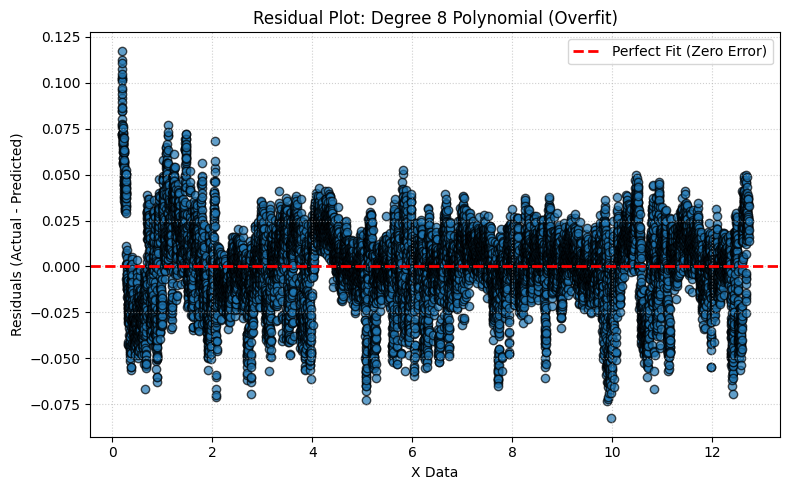

In [91]:
def plot_residuals(x, y_actual, y_predicted, model_name="Model"):
    """
    Calculates and plots the residuals (errors) of a fitted model.
    """
    # 1. Calculate the residuals
    residuals = y_actual - y_predicted
    
    # 2. Create the scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, residuals, color='tab:blue', alpha=0.7, edgecolor='black')
    
    # 3. Add the zero-error reference line
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Perfect Fit (Zero Error)')
    
    # 4. Format the plot for readability
    plt.title(f"Residual Plot: {model_name}")
    plt.xlabel("X Data")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()
    
    return residuals

# --- Example: Testing Degree 1 vs Degree 8 ---
if __name__ == "__main__":
    # Generate some fake curvy data with noise
    x_test = time
    y_actual = moles_consumed
    
    # Fit a degree 1 (straight line) and a degree 8 polynomial
    coeffs_deg1 = np.polyfit(x_test, y_actual, 1)
    coeffs_deg8 = np.polyfit(x_test, y_actual, 8)
    
    y_pred_deg1 = fitted_data1
    y_pred_deg8 = fitted_data8
    
    # Plot the residuals for both
    # Run these one at a time to see the difference!
    plot_residuals(x_test, y_actual, y_pred_deg1, "Degree 1 Polynomial (Underfit)")
    plot_residuals(x_test, y_actual, y_pred_deg8, "Degree 8 Polynomial (Overfit)")

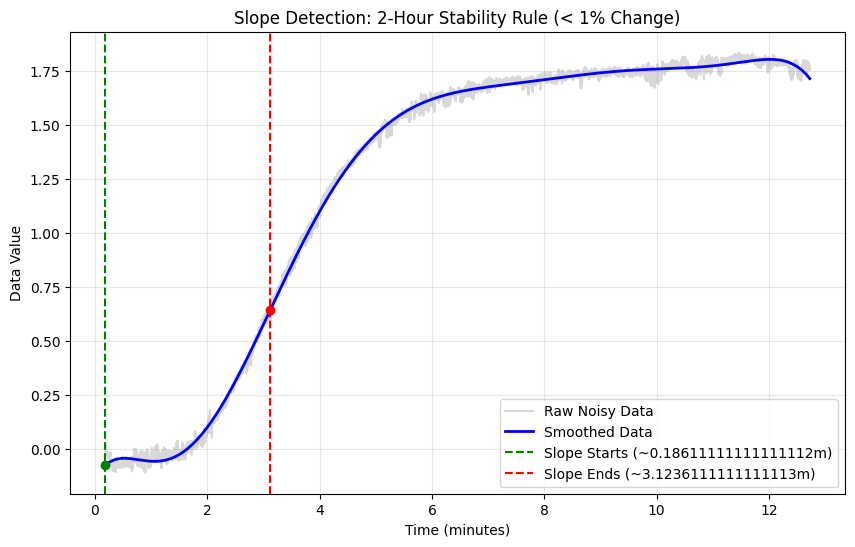

In [ ]:


def detect_slope_bounds(time, data, window_mins=180, threshold=0.05):
    """
    Identifies the start and end of a slope in noisy data.
    
    Parameters:
    - time: Array of time values in minutes.
    - data: Array of noisy data values.
    - window_mins: The span to check for stability (default 120 mins).
    - threshold: Relative change in slope (0.01 = 1%).
    """
    
    # 1. Smooth the data to handle noise (Savitzky-Golay filter)
    # Window length must be odd; 51 is a good starting point for 1min intervals
    smoothed = savgol_filter(data, window_length=71, polyorder=3)
    
    # 2. Calculate the slope (dy/dt)
    slopes = np.gradient(smoothed, time)
    
    start_idx = None
    end_idx = None
    
    # 3. Find Start: first point where slope is significantly non-zero
    # (Defined here as 10% of the maximum observed slope)
    max_slope = np.max(np.abs(slopes))
    start_threshold = max_slope * 0.1
    for i in range(len(slopes)):
        if abs(slopes[i]) > start_threshold:
            start_idx = i
            break
            
    # 4. Find End: 2-hour window where the average change in slope is < 1%
    # We iterate from the start point onwards
    if start_idx is not None:
        for i in range(start_idx, len(slopes) - window_mins):
            # Get the slope at the start and end of the 2-hour window
            m_now = slopes[i]
            m_future = slopes[i + window_mins]
            
            # Calculate relative change
            if abs(m_now) > 1e-6:
                rel_change = abs((m_future - m_now) / m_now)
            else:
                rel_change = 0 # If slope is effectively zero, it has ended
            
            # Check if change is less than 1% (0.01)
            # We look for this after the slope has passed its peak
            if rel_change < threshold and i > np.argmax(np.abs(slopes)):
                end_idx = i
                break
                
    return start_idx, end_idx, smoothed

# --- Example Usage & Plotting ---

start, end, y_smooth = detect_slope_bounds(time,fitted_data1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time, moles_consumed, label='Raw Noisy Data', color='gray', alpha=0.3)
plt.plot(time, y_smooth, label='Smoothed Data', color='blue', linewidth=2)

if start is not None:
    plt.axvline(time[start], color='green', linestyle='--', label=f'Slope Starts (~{time[start]}m)')
    plt.scatter(time[start], y_smooth[start], color='green', zorder=5)

if end is not None:
    plt.axvline(time[end], color='red', linestyle='--', label=f'Slope Ends (~{time[end]}m)')
    plt.scatter(time[end], y_smooth[end], color='red', zorder=5)

plt.title("Slope Detection: 2-Hour Stability Rule (< 1% Change)")
plt.xlabel("Time (minutes)")
plt.ylabel("Data Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

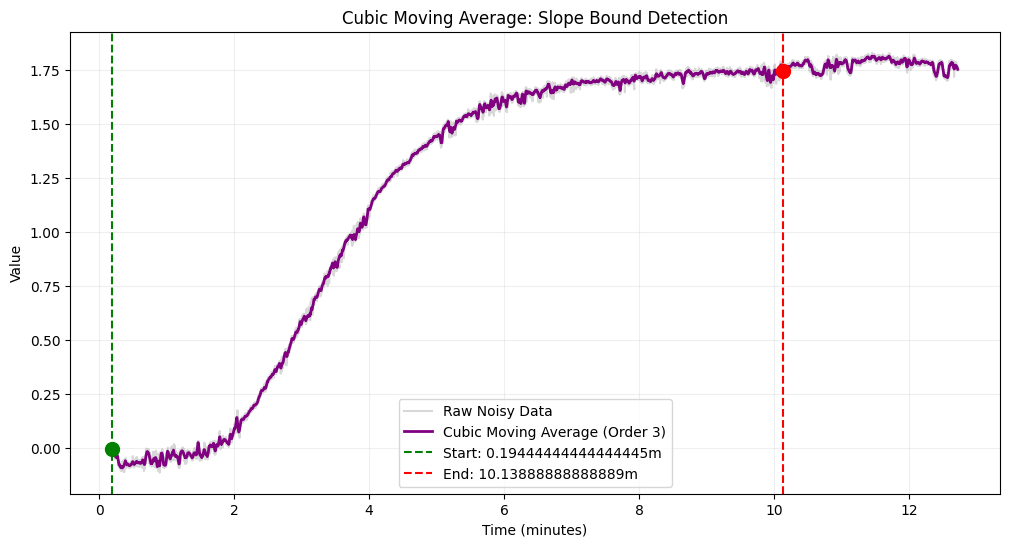

In [51]:

from scipy.signal import savgol_filter

def detect_slope_cubic(time, data, smooth_window=71, stability_window=120, threshold=0.01):
    """
    Identifies slope bounds using a Cubic Moving Average (Savitzky-Golay polyorder 3).
    """
    # 1. Apply Cubic Moving Average
    # window_length must be odd and greater than polyorder (3)
    smoothed = savgol_filter(data, window_length=smooth_window, polyorder=3)
    
    # 2. Calculate Slope (Gradient of the cubic fit)
    slopes = np.gradient(smoothed, time)
    
    # 3. Find Start Point
    # Define start as 10% of the max absolute slope
    max_slope = np.max(np.abs(slopes))
    start_threshold = max_slope * 0.1
    start_idx = np.where(np.abs(slopes) > start_threshold)[0][0]
    
    # 4. Find End Point (Stability Rule)
    # Average change in slope over 2 hours (120 min) is less than 1%
    end_idx = None
    peak_idx = np.argmax(np.abs(slopes))
    
    for i in range(peak_idx, len(slopes) - stability_window):
        m_start = slopes[i]
        m_end = slopes[i + stability_window]
        
        # Relative change in slope across the 120-min span
        if abs(m_start) > 1e-6:
            rel_change = abs((m_end - m_start) / m_start)
        else:
            rel_change = 0
            
        if rel_change < threshold:
            end_idx = i
            break
            
    return start_idx, end_idx, smoothed

# --- Visualization ---


# Run detection
s_idx, e_idx, y_smooth = detect_slope_cubic(t, y_noisy, smooth_window=61)

plt.figure(figsize=(12, 6))
plt.plot(t, y_noisy, label='Raw Noisy Data', color='gray', alpha=0.3)
plt.plot(t, y_smooth, label='Cubic Moving Average (Order 3)', color='purple', linewidth=2)

if s_idx is not None:
    plt.axvline(t[s_idx], color='green', linestyle='--', label=f'Start: {t[s_idx]}m')
    plt.scatter(t[s_idx], y_smooth[s_idx], color='green', s=100, zorder=5)

if e_idx is not None:
    plt.axvline(t[e_idx], color='red', linestyle='--', label=f'End: {t[e_idx]}m')
    plt.scatter(t[e_idx], y_smooth[e_idx], color='red', s=100, zorder=5)

plt.title("Cubic Moving Average: Slope Bound Detection")
plt.xlabel("Time (minutes)")
plt.ylabel("Value")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

Calculating robust inflections...
Success! Filtered down to 6 valid inflection points.


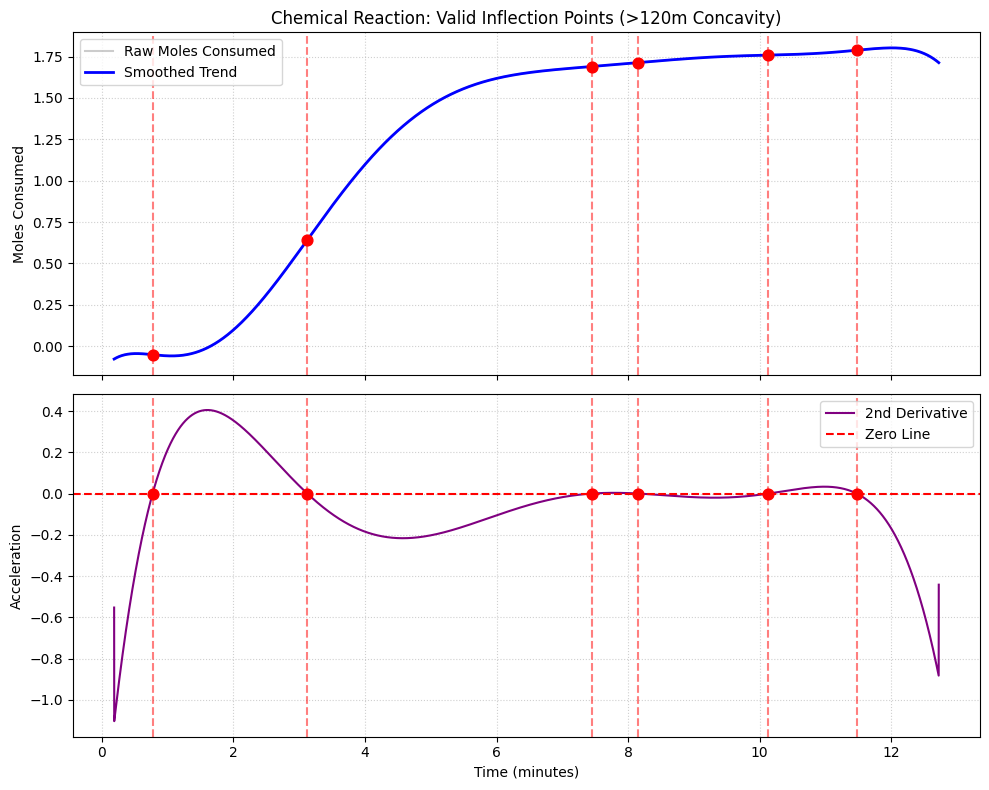

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def find_robust_inflections(time, y, smooth_window=101, poly_order=3, min_duration=120):
    """
    Finds inflection points and filters out any where the new concavity 
    does not last for at least 'min_duration' minutes.
    """
    # 1. Smooth the data
    smoothed_y = savgol_filter(y, window_length=smooth_window, polyorder=poly_order)
    
    # 2. Calculate Derivatives
    dy_dt = np.gradient(smoothed_y, time)
    d2y_dt2 = np.gradient(dy_dt, time)
    
    # 3. Find ALL zero-crossings
    # Create a boolean array (True if positive, False if negative)
    # np.diff triggers wherever this boolean value flips
    is_positive = d2y_dt2 > 0
    all_crossings = np.where(np.diff(is_positive))[0]
    
    valid_inflections = []
    
    # 4. Apply the 120-minute duration test
    for i in range(len(all_crossings)):
        idx = all_crossings[i]
        t_current = time[idx]
        
        # Find the time of the *next* crossing
        if i + 1 < len(all_crossings):
            t_next = time[all_crossings[i + 1]]
        else:
            # If it's the last crossing, the concavity lasts until the end of the data
            t_next = time[-1] 
            
        # Check if the duration is at least 120 minutes
        if (t_next - t_current) >= min_duration:
            valid_inflections.append(idx)
            
    return valid_inflections, smoothed_y, d2y_dt2

# --- Safe Plotting Block ---
if __name__ == "__main__":
    # Load your actual data arrays here
    x_data = time
    y_data = fitted_data1
    #moles_consumed
    
    print("Calculating robust inflections...")
    # I bumped the smooth_window to 101 as a safer starting point for chemical data
    valid_pts, y_smooth, second_deriv = find_robust_inflections(x_data, y_data, smooth_window=71, min_duration=0)
    
    print(f"Success! Filtered down to {len(valid_pts)} valid inflection points.")
    
    # Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    
    # Top Plot
    ax1.plot(x_data, y_data, color='gray', alpha=0.4, label='Raw Moles Consumed')
    ax1.plot(x_data, y_smooth, color='blue', linewidth=2, label='Smoothed Trend')
    ax1.set_title("Chemical Reaction: Valid Inflection Points (>120m Concavity)")
    ax1.set_ylabel("Moles Consumed")
    ax1.grid(True, linestyle=':', alpha=0.6)
    
    # Bottom Plot
    ax2.plot(x_data, second_deriv, color='purple', label='2nd Derivative')
    ax2.axhline(0, color='red', linestyle='--', label='Zero Line')
    ax2.set_xlabel("Time (minutes)")
    ax2.set_ylabel("Acceleration")
    ax2.grid(True, linestyle=':', alpha=0.6)
    
    # Safely mark ONLY the valid points
    if len(valid_pts) > 0:
        ax1.scatter(x_data[valid_pts], y_smooth[valid_pts], color='red', s=60, zorder=5)
        ax2.scatter(x_data[valid_pts], second_deriv[valid_pts], color='red', s=60, zorder=5)
        
        for idx in valid_pts:
            ax1.axvline(x_data[idx], color='red', linestyle='--', alpha=0.5)
            ax2.axvline(x_data[idx], color='red', linestyle='--', alpha=0.5)

    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.show()